In [172]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


## EDA

Checking the Population Distribution in the Eonomic Region of Twin Cities which includes 7 counties - Hennepin, Ramsey, Anoka, Carver, Dakota, Washington and Scott.

Text(0.5, 1.0, 'Population in 2021 for all counties in the Twin Cities')

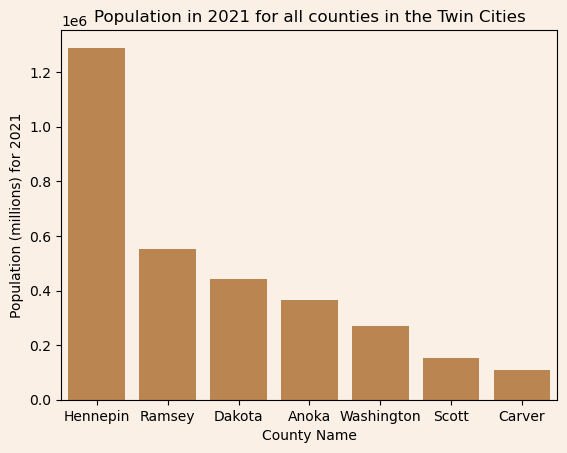

In [173]:
pop = pd.read_excel('data/raw/mn_county_edr_historical_estimates_sdc_1990-2021_tcm36-543021.xlsx') #loading census data
#Filtering for required counties
pop = pop.loc[(pop['Geography Name'].isin(['Anoka','Carver','Dakota','Hennepin','Ramsey','Scott','Washington']))&(pop.Year==2021),['Geography Name','Population']]
#Sort by population numbers 
pop = pop.sort_values(by='Population',ascending=False)


#Plot the population figures
plt.figure(facecolor='linen')
ax = plt.axes()
sns.barplot(data=pop,x='Geography Name',y='Population',color='peru')
ax.set_xlabel('County Name')
ax.set_ylabel('Population (millions) for 2021')
ax.set_facecolor("linen")
ax.set_title('Population in 2021 for all counties in the Twin Cities')

# sns.set_palette('rocket',cmap=True)

In [174]:
#Reading the consolidated data from the acquisition stage
df = pd.read_csv('data/consolidated/consolidatedDataset.csv')
df['day']= 1 #creatning dummy day variable to convert year and month to date for better plots
df['date'] = pd.to_datetime(df[["year", "month", "day"]]) #generating date from year and month
cols = df.columns.to_list() #storing the columns

Text(0, 0.5, 'Cases')

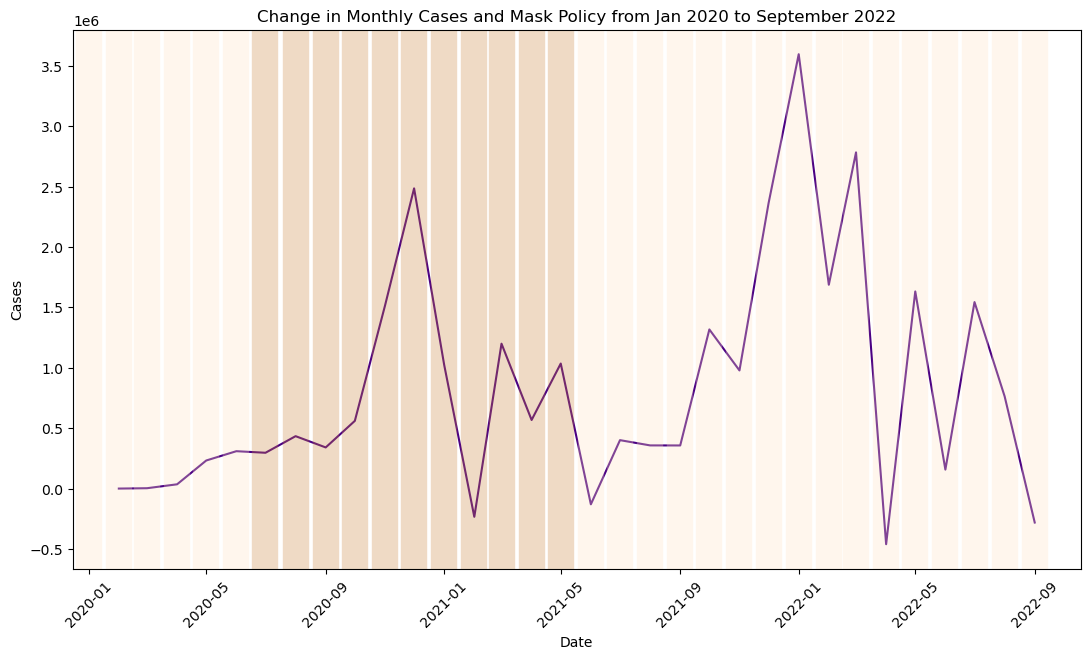

In [175]:
#PLotting the change in cases against the mask policy for 2020,2021 and 2022
plt.figure(figsize=(13,7))
sns.lineplot(x=df.date,y=df.monthly_change_cases,color='indigo')

for i in df.index:
    if df.iloc[i,cols.index('masks')] == 1:
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color='peru',alpha=0.3,linewidth=19)
    else:
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color='bisque',alpha=0.3,linewidth=19)

plt.xticks(rotation=45)
plt.title('Change in Monthly Cases and Mask Policy from Jan 2020 to September 2022')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Cases')

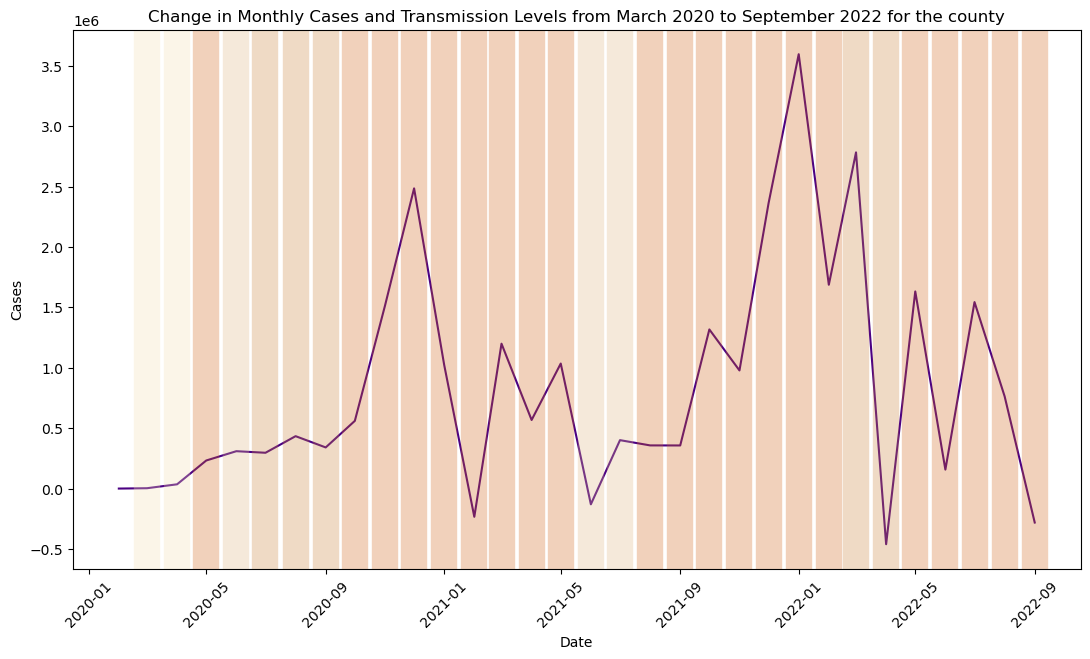

In [148]:
#PLotting the change in cases against the transmission levels for 2020,2021 and 2022

change_points = ['2020-07-01','2021-05-01']
plt.figure(figsize=(13,7))
sns.lineplot(data=df,x='date',y='monthly_change_cases',color='indigo')
COLORS = {
    'high':'chocolate',
    'low':'wheat',
    'substantial':'peru',
    'moderate':'burlywood'
}
df['colors'] = df.community_transmission_level.map(COLORS)
for i in df.loc[df.date>pd.to_datetime(pd.to_datetime('2020-02-01'))].index:
    if df.iloc[i,cols.index('community_transmission_level')] == 'high':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    elif df.iloc[i,cols.index('community_transmission_level')] == 'low':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    elif df.iloc[i,cols.index('community_transmission_level')] == 'moderate':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    else :
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)

plt.xticks(rotation=45)
plt.title('Change in Monthly Cases and Transmission Levels from March 2020 to September 2022 for the county')
plt.xlabel('Date')
plt.ylabel('Cases')

In [145]:
#Calculating the chnage in monthly claims
df['change_in_total_claims'] = df['total_claims'].sub(df['total_claims'].shift())
df['change_in_total_claims'].iloc[0]=df['change_in_total_claims'].iloc[0]

/var/folders/d6/y9k8fd5d2r36cln9ssdj6kqw0000gn/T/ipykernel_69619/3618631903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_in_total_claims'].iloc[0]=df['change_in_total_claims'].iloc[0]


Text(0.5, 0, 'Date')

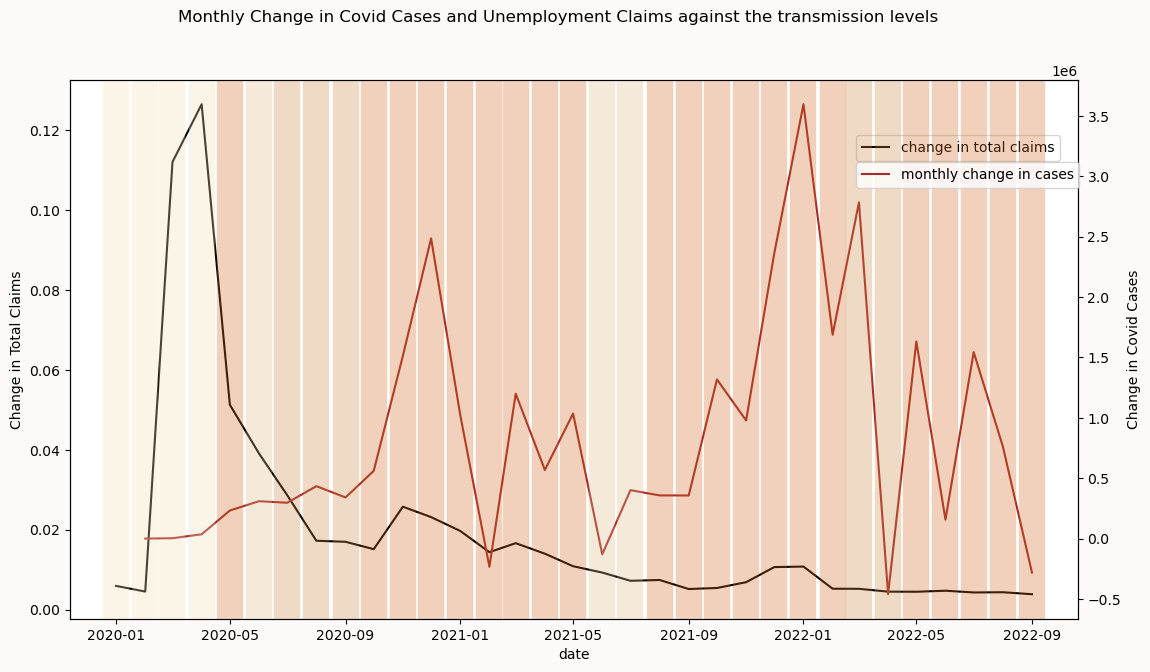

In [153]:
#plotting change in claims against the transmission levels

fig,ax = plt.subplots(figsize=(13,7),facecolor='snow')
ax = plt.gca()
ax1 = ax.twinx()

sns.lineplot(x=df.date,y=df.total_claims,color='black',label='change in total claims',ax=ax)
sns.lineplot(x=df.date,y=df.monthly_change_cases,color='brown',label='monthly change in cases',ax=ax1)
ax.set_ylabel('Change in Total Claims')
ax1.set_ylabel('Change in Covid Cases')
ax1.legend(loc=(0.78,0.8),facecolor='white')
ax.legend(loc=(0.78,0.85),facecolor='white')

df['colors'] = df.community_transmission_level.map(COLORS)
for i in df.index:
    if df.iloc[i,cols.index('community_transmission_level')] == 'high':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    elif df.iloc[i,cols.index('community_transmission_level')] == 'low':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    elif df.iloc[i,cols.index('community_transmission_level')] == 'moderate':
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)
    else :
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color=COLORS[df.iloc[i,cols.index('community_transmission_level')]],alpha=0.3,linewidth=19)

plt.xticks(rotation=45)
plt.suptitle('Monthly Change in Covid Cases and Unemployment Claims against the transmission levels')
plt.xlabel('Date')
# plt.ylabel('Cases')


Text(0.5, 0, 'Date')

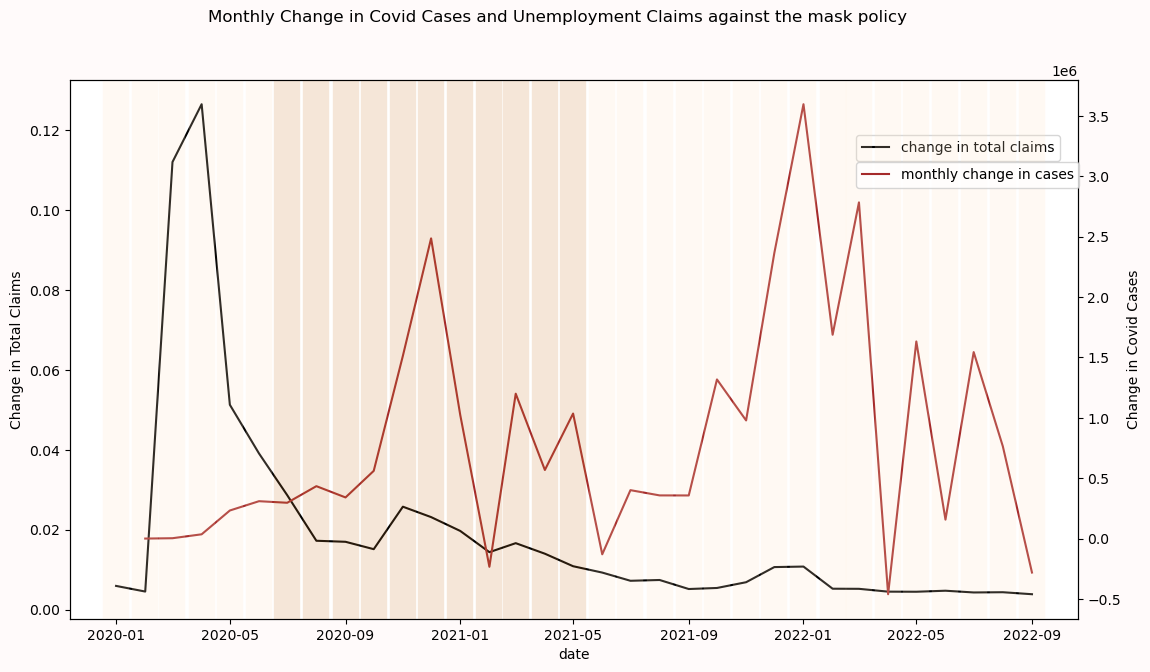

In [154]:
#plotting change in claims against the mask policy
fig,ax = plt.subplots(figsize=(13,7),facecolor='snow')
ax = plt.gca()
ax1 = ax.twinx()

sns.lineplot(x=df.date,y=df.total_claims,color='black',label='change in total claims',ax=ax)
sns.lineplot(x=df.date,y=df.monthly_change_cases,color='brown',label='monthly change in cases',ax=ax1)
ax.set_ylabel('Change in Total Claims')
ax1.set_ylabel('Change in Covid Cases')
ax1.legend(loc=(0.78,0.8),facecolor='white')
ax.legend(loc=(0.78,0.85),facecolor='white')

for i in df.index:
    if df.iloc[i,cols.index('masks')] == 1:
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color='peru',alpha=0.2,linewidth=19)
    else:
        plt.axvline(pd.to_datetime(df.iloc[i,cols.index('date')]), color='bisque',alpha=0.2,linewidth=19)

plt.xticks(rotation=45)
plt.suptitle('Monthly Change in Covid Cases and Unemployment Claims against the mask policy')
plt.xlabel('Date')
# plt.ylabel('Cases')

## Statistical Tests

First we look at how Mask Policy and Transmission Levels had an effect on Unemployment Cases.
Then we perform statistical tests for 3 Demographical groups and also at an industry level.

### 1. Was there a change in the Unemployment Claims dur to the mask policy?

Text(0.5, 0, 'Masks')

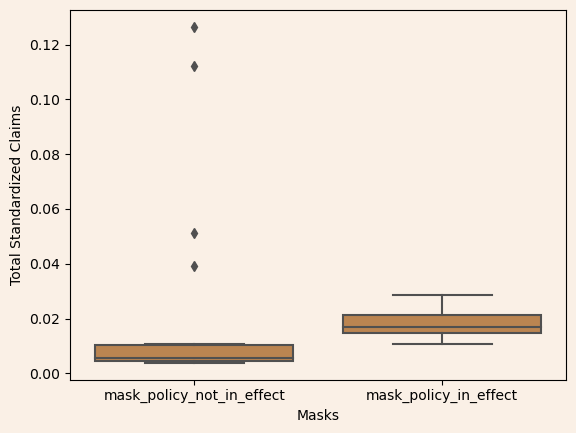

In [158]:
plt.figure(facecolor='linen')
ax = plt.axes()
ax.set_facecolor('linen')
sns.boxplot(data=df, x="masks",y="total_claims",color='peru')
ax.set_xticklabels(['mask_policy_not_in_effect','mask_policy_in_effect'])
ax.set_ylabel('Total Standardized Claims')
ax.set_xlabel('Masks')

#There is a change in claims based on the mask policy.
#This makes sense intuitively as when cases were high, mask policies were brought into effect and in turn unemployment numbers rose.

### 2. Was there a change in the Unemployment Claims due to the transmission levels?

Text(0.5, 0, 'Transmission Level')

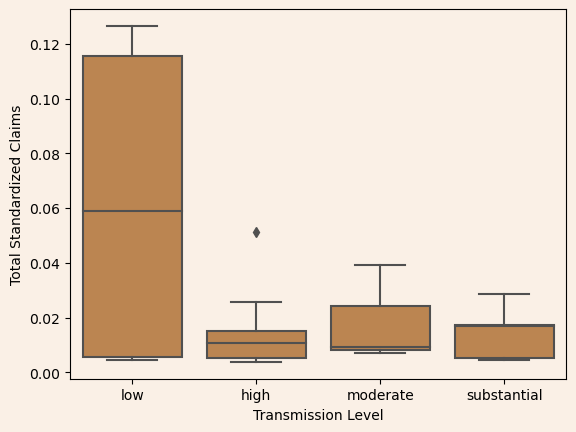

In [159]:
plt.figure(facecolor='linen')
ax = plt.axes()
ax.set_facecolor('linen')
sns.boxplot(data=df, x="community_transmission_level",y="total_claims",color='peru')
ax.set_ylabel('Total Standardized Claims')
ax.set_xlabel('Transmission Level')

#The transmissions were low only during the beginning on the pandemic and due to the uncertainty and fear in the market during that time,
#there was a spike in claims and that is why the boxplot for low has a long range. 

### 1. Three Way ANOVA test for Ethnicity, Transmission Levels and Mask Policy in 2020

In [176]:
df_eth = df.loc[:,['hispanic_or_latino', 'not_hispanic_or_latino','year','month','community_transmission_level','masks']]
df_eth = df_eth.melt(['year','month','community_transmission_level','masks'])
df_eth.rename(columns={'variable':'ethnicity','value':'claims'},inplace=True)
df_eth = pd.DataFrame(df_eth.groupby(['year','community_transmission_level','ethnicity','masks'])['claims'].sum())
df_eth.reset_index(inplace=True)

model = ols('claims ~ C(ethnicity) + C(community_transmission_level) + C(masks)',data=df_eth.loc[df_eth.year==2020,:]).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova


,sum_sq,df,F,PR(>F)
C(ethnicity),0.001005,1.0,8.324777,0.044775
C(community_transmission_level),0.054679,3.0,150.948426,0.000143
C(masks),0.000452,1.0,3.741652,0.125190
Residual,0.000483,4.0,NaN,NaN


Text(0, 0.5, 'Standardized Claims')

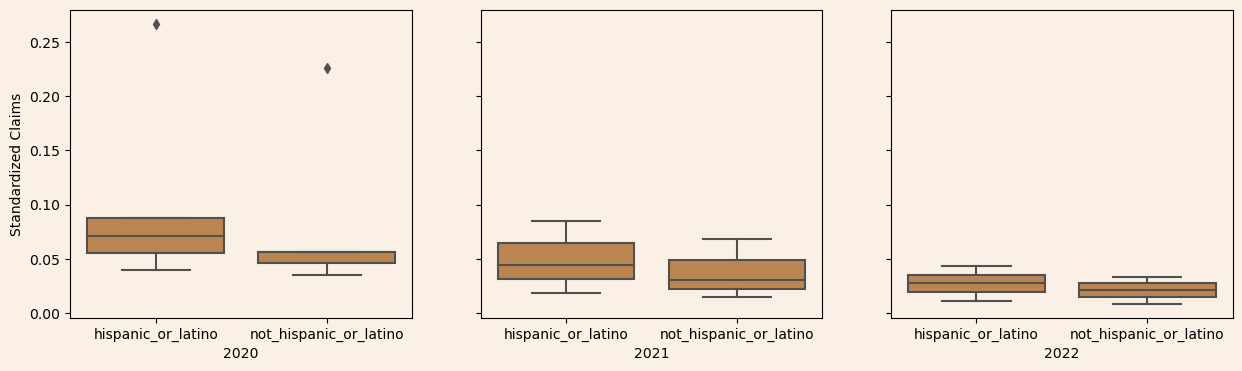

In [163]:
#plotting the Claims vs Ethnicity boxplots for 2020, 2021 and 2022
years =[2020,2021,2022]
fig,ax = plt.subplots(1,3,figsize=(15,4),facecolor='linen',sharey=True,sharex=True)
for i in years:
    sns.boxplot(data=df_eth.loc[df_eth.year==i,:], x="ethnicity",y="claims",color='peru',ax=ax[years.index(i)])
    ax[years.index(i)].set_xlabel(i)
for a in ax:
    a.set_ylabel('')
    a.set_facecolor("linen")

ax[0].set_ylabel('Standardized Claims')

### 2. Three Way ANOVA test for Race, Transmission Levels and Mask Policy in 2020

In [177]:
df_race = df.loc[:,['american_indian_or_alaska_native','asian', 'black_or_african_american','native_hawaiian_or_other_pacific_islander', 'white','year','month','community_transmission_level','masks']]
df_race = df_race.melt(['year','month','community_transmission_level','masks'])
df_race.rename(columns={'variable':'race','value':'claims'},inplace=True)
df_race = pd.DataFrame(df_race.groupby(['year','community_transmission_level','race','masks'])['claims'].sum())
df_race.reset_index(inplace=True)

model = ols('claims ~ C(race) + C(community_transmission_level) + C(masks)',data=df_race.loc[df_race.year==2020,:]).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova


,sum_sq,df,F,PR(>F)
C(race),0.020314,4.0,8.812483,5.867992e-04
C(community_transmission_level),0.174935,3.0,101.184582,1.289046e-10
C(masks),0.000416,1.0,0.722671,4.078106e-01
Residual,0.009221,16.0,NaN,NaN


Text(0, 0.5, 'Standardized Claims')

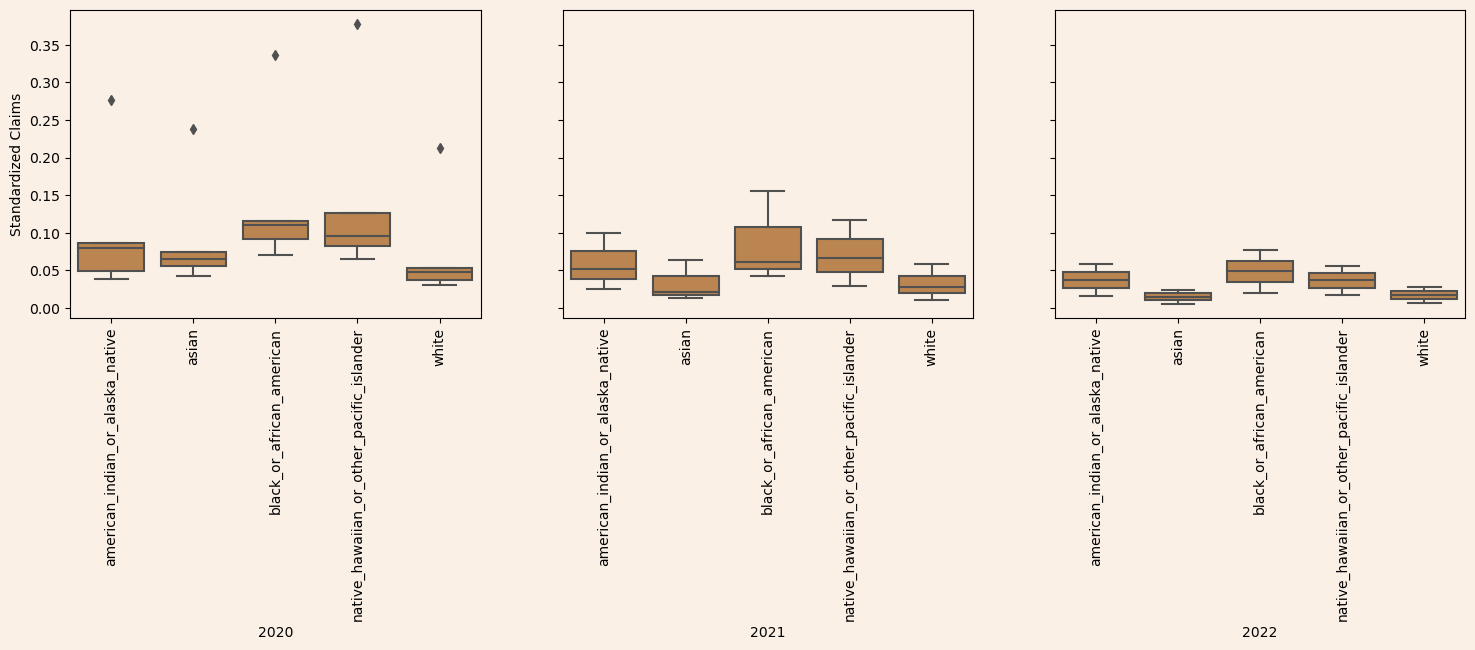

In [166]:
#plotting the Claims vs Race boxplots for 2020, 2021 and 2022

years =[2020,2021,2022]
fig,ax = plt.subplots(1,3,figsize=(18,4),facecolor='linen',sharey=True,sharex=True)
for i in years:
    sns.boxplot(data=df_race.loc[df_race.year==i,:], x="race",y="claims",color='peru',ax=ax[years.index(i)])
    ax[years.index(i)].set_xlabel(i)
for a in ax:
    a.set_ylabel('')
    a.set_facecolor("linen")
    a.set_xticklabels(df_race.race.unique(),rotation=90)


ax[0].set_ylabel('Standardized Claims')

### 3. Three Way ANOVA test for Sex, Transmission Levels and Mask Policy in 2020

In [178]:
df_sex = df.loc[:,['female','male','year','month','community_transmission_level','masks']]
df_sex = df_sex.melt(['year','month','community_transmission_level','masks'])
df_sex.rename(columns={'variable':'sex','value':'claims'},inplace=True)
df_sex = pd.DataFrame(df_sex.groupby(['year','community_transmission_level','sex','masks'])['claims'].sum())
df_sex.reset_index(inplace=True)

model = ols('claims ~ C(sex) + C(community_transmission_level) + C(masks)',data=df_sex.loc[df_sex.year==2020,:]).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova


,sum_sq,df,F,PR(>F)
C(sex),0.000348,1.0,1.710376,0.261034
C(community_transmission_level),0.055776,3.0,91.297225,0.000387
C(masks),0.000160,1.0,0.786296,0.425320
Residual,0.000815,4.0,NaN,NaN


Text(0, 0.5, 'Standardized Claims')

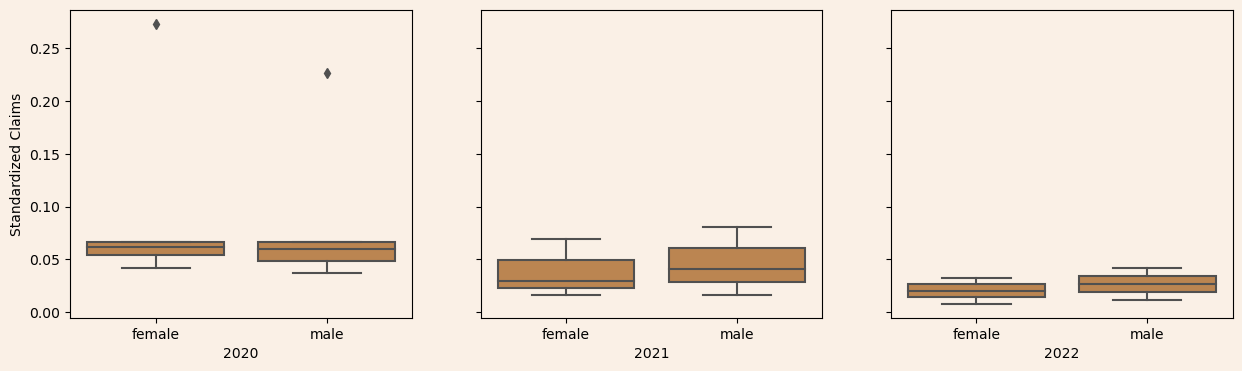

In [168]:
#plotting the Claims vs Sex boxplots for 2020, 2021 and 2022
fig,ax = plt.subplots(1,3,figsize=(15,4),facecolor='linen',sharey=True)
for i in years:
    sns.boxplot(data=df_sex.loc[df_sex.year==i,:], x="sex",y="claims",color='peru',ax=ax[years.index(i)])
    ax[years.index(i)].set_xlabel(i)
for a in ax:
    a.set_ylabel('')
    a.set_facecolor("linen")
ax[0].set_ylabel('Standardized Claims')

### 4. Three Way ANOVA test for Industry, Transmission Levels and Mask Policy in 2020

In [179]:
df_ind = df.loc[:,['accommodation_and_food_services', 'administrative_and_waste_services',
       'agriculture,_forestry,_fishing_and_hunting',
       'arts,_entertainment,_and_recreation', 'construction',
       'educational_services', 'finance_and_insurance',
       'health_care_and_social_assistance', 'information',
       'management_of_companies_and_enterprises', 'manufacturing', 'mining',
       'other_services_(except_public_administration)',
       'professional,_scientific,_and_technical_services',
       'real_estate_and_rental_and_leasing', 'retail_trade', 'total_claims',
       'transportation_and_warehousing', 'wholesale_trade','year','month','community_transmission_level','masks']]
df_ind = df_ind.melt(['year','month','community_transmission_level','masks'])
df_ind.rename(columns={'variable':'industry','value':'claims'},inplace=True)
df_ind = pd.DataFrame(df_ind.groupby(['year','community_transmission_level','industry','masks'])['claims'].sum())
df_ind.reset_index(inplace=True)

model = ols('claims ~ C(industry) + C(community_transmission_level) + C(masks)',data=df_ind.loc[df_ind.year==2020,:]).fit()
anova = sm.stats.anova_lm(model,typ=2)
anova


,sum_sq,df,F,PR(>F)
C(industry),0.213310,18.0,3.088776,3.549886e-04
C(community_transmission_level),0.592867,3.0,51.509150,6.829052e-18
C(masks),0.005316,1.0,1.385547,2.430351e-01
Residual,0.276238,72.0,NaN,NaN


Text(0, 0.5, 'Standardized Claims')

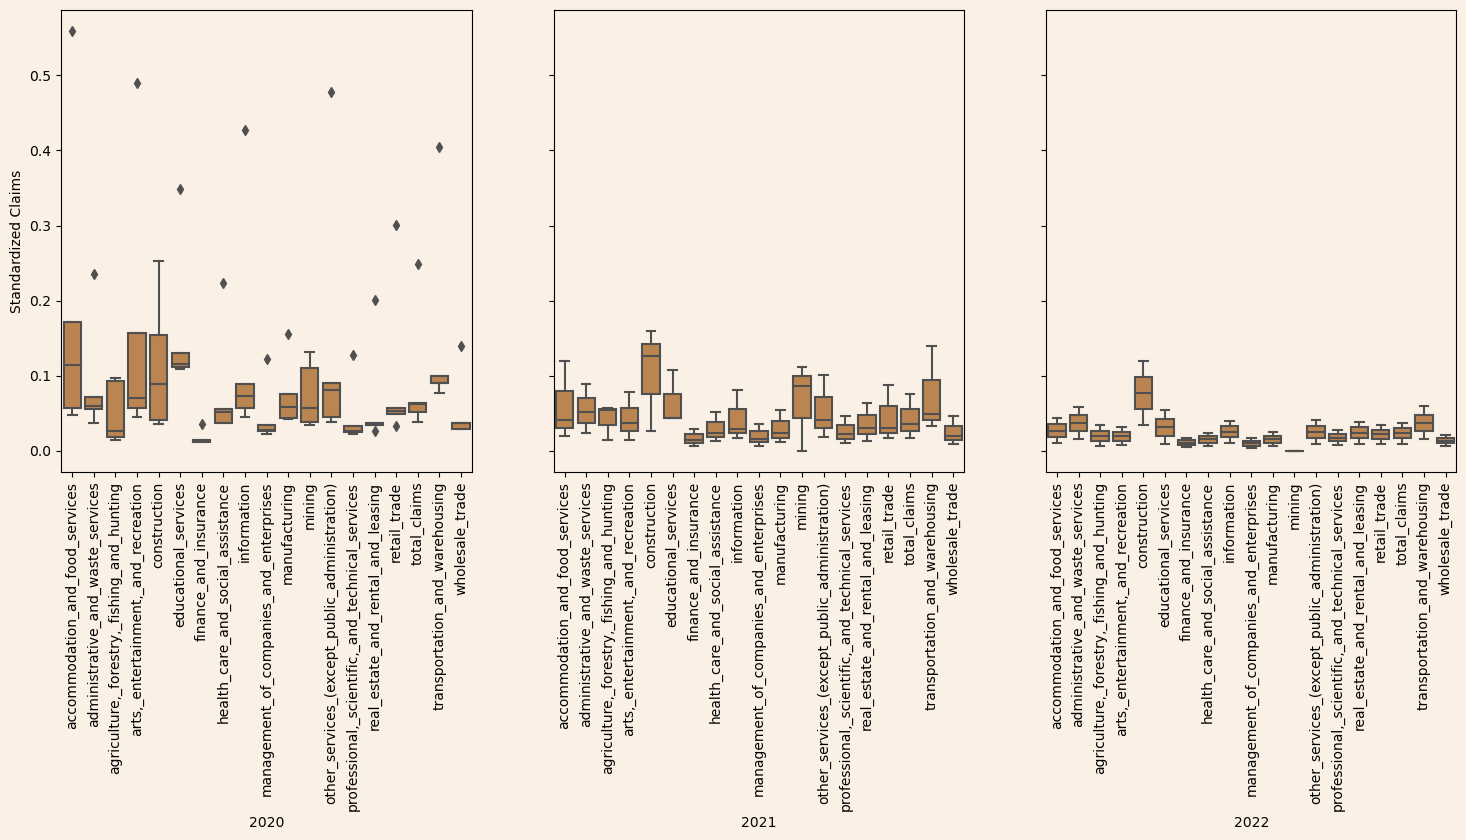

In [171]:
#plotting the Claims vs Industry boxplots for 2020, 2021 and 2022
fig,ax = plt.subplots(1,3,figsize=(18,6),facecolor='linen',sharey=True)
for i in years:
    sns.boxplot(data=df_ind.loc[df_ind.year==i,:], x="industry",y="claims",color='peru',ax=ax[years.index(i)])
    ax[years.index(i)].set_xlabel(i)
for a in ax:
    a.set_ylabel('')
    a.set_facecolor("linen")
    a.set_xticklabels(df_ind.industry.unique(),rotation=90)
ax[0].set_ylabel('Standardized Claims')

** All results are discussed in the Report and Presentation

### Regression Model

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .....................max_features=2, n_estimators=5; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=5; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=5; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=14; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=14; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=14; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=20; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=20; total time=   0.0s
[CV] END ....................max_features=2, n_e

<AxesSubplot:>

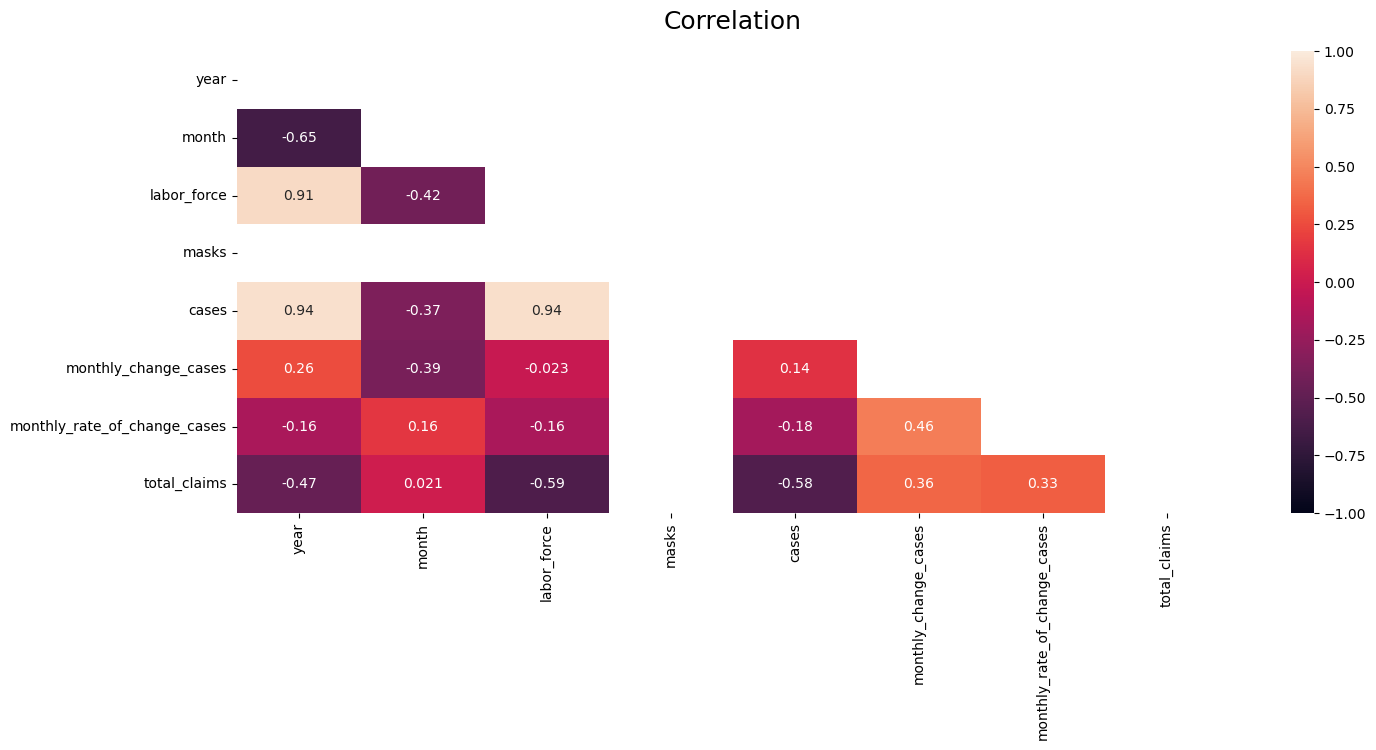

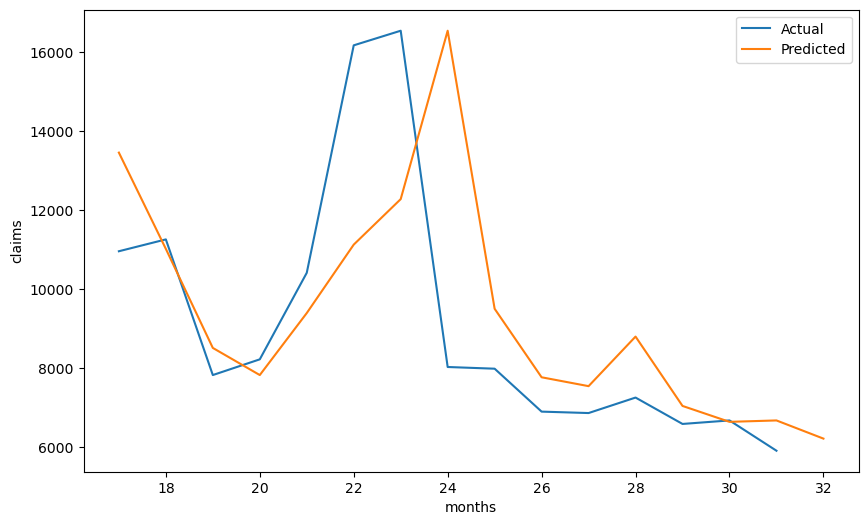

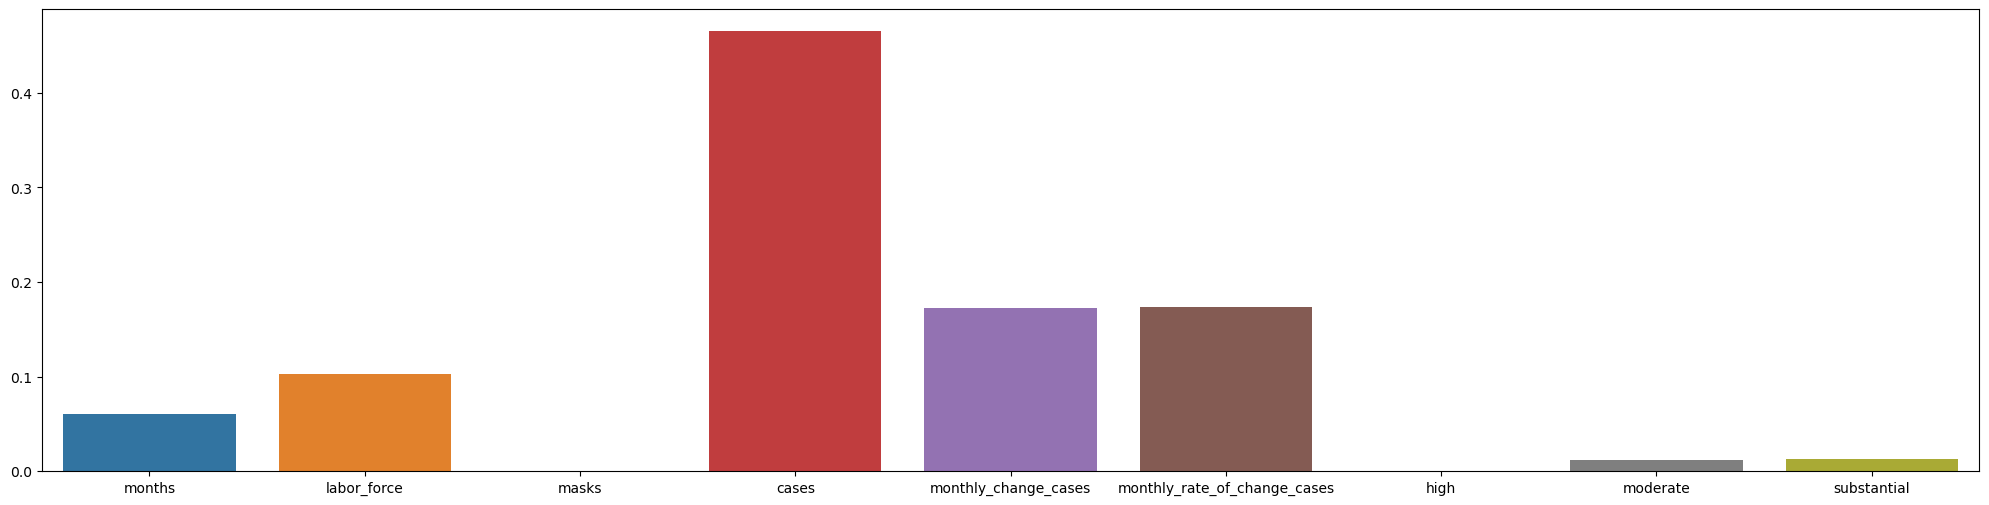

In [42]:
col_list=['year','month','community_transmission_level','masks','cases','monthly_change_cases','monthly_rate_of_change_cases','total_claims']
df_reg = df.loc[(df.date>pd.to_datetime(change_points[1])),col_list]
y = df_reg.loc[:,'total_claims']
x = df_reg.loc[:,[i for i in df_reg.columns if i not in ['total_claims']]]
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_reg.corr(), dtype=bool))
heatmap = sns.heatmap(df_reg.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16)
x.reset_index(inplace=True)
x.index=x.index+1
x.rename(columns={'index':'months'},inplace=True)
x.drop(columns=['year','month'],inplace=True)
# map_transmission = {'high':4,'substantial':3,'moderate':2,'low':1}
# x['community_transmission_level'] = x.community_transmission_level.map(map_transmission)
# x.fillna(0,inplace=True)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(x[['community_transmission_level']])
x[ohe.categories_[0]] = transformed.toarray()
x.drop(columns='community_transmission_level',inplace=True)
x.fillna(0,inplace=True)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': range(2,7),
    'n_estimators': [5, 10, 14, 20]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(x, y)
grid_search.best_params_
regressor = RandomForestRegressor(n_estimators=5,max_features=3, random_state=0)
regressor.fit(x, y)
y_pred = regressor.predict(x)
mean_squared_error(y, y_pred)
df_try = pd.DataFrame()
df_try = x.copy()
y.reset_index(drop=True,inplace=True)
df_try['claims'] = y
df_try['pred_claims'] = y_pred
plt.figure(figsize=(10,6))
sns.lineplot(data=df_try,x='months',y='claims',label='Actual')
sns.lineplot(data=df_try,x='months',y='pred_claims',label='Predicted')
plt.figure(figsize=(25,6))
sns.barplot(x=x.columns,y=regressor.feature_importances_)